# CSC221 Team 9 Group Project

### Author: <font color='red'> Brian J Gill </font>

In [77]:
# import ssl
import ssl
ssl.create_default_https_context = ssl._create_unverified_context

# import the library we use to open URLs
import urllib.request

In [78]:
# url for the Wikipedia page of historical population the United States
url = "https://en.wikipedia.org/wiki/Demographics_of_the_United_States"

In [79]:
# open the url using urllib.request and put the HTML into the web_page variable
web_page = urllib.request.urlopen(url)

In [80]:
# import the BeautifulSoup library so we can parse HTML and XML documents
from bs4 import BeautifulSoup

# parse the HTML from our URL into the BeautifulSoup parse tree format
soup = BeautifulSoup(web_page, "lxml")

In [81]:
print(soup.prettify())

<!DOCTYPE html>
<html class="client-nojs vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vector-feature-limited-width-content-enabled vector-feature-zebra-design-disabled vector-feature-custom-font-size-clientpref-0 vector-feature-client-preferences-disabled vector-feature-client-prefs-pinned-disabled vector-feature-typography-survey-disabled vector-toc-available" dir="ltr" lang="en">
 <head>
  <meta charset="utf-8"/>
  <title>
   Demographics of the United States - Wikipedia
  </title>
  <script>
   (function(){var className="client-js vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientp

In [82]:
soup.title.string

'Demographics of the United States - Wikipedia'

In [83]:
# use the 'find_all' function to bring back all instances of the 'table' tag
all_tables = soup.find_all("table")
all_tables


[<table class="infobox" style="width: 25em"><tbody><tr><th class="infobox-above" colspan="2" style="background:#ddddff">Demographics of the <a href="/wiki/United_States" title="United States">United States</a></th></tr><tr><td class="infobox-image" colspan="2"><span typeof="mw:File"><a class="mw-file-description" href="/wiki/File:USA_Population_Pyramid.svg"><img class="mw-file-element" data-file-height="2418" data-file-width="2822" decoding="async" height="300" src="//upload.wikimedia.org/wikipedia/commons/thumb/b/bd/USA_Population_Pyramid.svg/350px-USA_Population_Pyramid.svg.png" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/b/bd/USA_Population_Pyramid.svg/525px-USA_Population_Pyramid.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/b/bd/USA_Population_Pyramid.svg/700px-USA_Population_Pyramid.svg.png 2x" width="350"/></a></span><div class="infobox-caption"><a href="/wiki/Population_pyramid" title="Population pyramid">Population pyramid</a> of the United States as 

In [84]:
# use the find function to find the right table with the data we need
right_table = soup.find('table', class_='us-census-pop us-census-pop-right')
print(right_table.prettify())

<table class="us-census-pop us-census-pop-right">
 <caption>
  Historical population
 </caption>
 <tbody>
  <tr>
   <th scope="col">
    Census
   </th>
   <th scope="col">
    <abbr title="Population">
     Pop.
    </abbr>
   </th>
   <th scope="col">
    <style data-mw-deduplicate="TemplateStyles:r1152813436">
     .mw-parser-output .sr-only{border:0;clip:rect(0,0,0,0);clip-path:polygon(0px 0px,0px 0px,0px 0px);height:1px;margin:-1px;overflow:hidden;padding:0;position:absolute;width:1px;white-space:nowrap}
    </style>
    <span class="sr-only">
     Note
    </span>
   </th>
   <th scope="col">
    <abbr title="Percent change">
     %±
    </abbr>
   </th>
  </tr>
  <tr>
   <th scope="row">
    <a href="/wiki/1790_United_States_census" title="1790 United States census">
     1790
    </a>
   </th>
   <td>
    3,929,326
   </td>
   <td>
   </td>
   <td>
    —
   </td>
  </tr>
  <tr>
   <th scope="row">
    <a href="/wiki/1800_United_States_census" title="1800 United States census">


In [85]:
# Create 3 empty lists to hold the column data
A = []
B = []
C = []

# COPY CODE FROM STEPS 9 & 10 HERE 
rows = right_table.find_all('tr')
for row in rows:
    
    # Find the table header in this row (if scope="row")
    head = row.find('th', {"scope" : "row"})
    if head:
        if head.a:
            A.append(head.a.text)
        else:
            break
        
    # Copy the same find_all('td') used above to find_all('td') the cells (columns) from [Step 10]   
    columns = row.find_all('td')
    
    # Check the len() to see if it is a row we want, then APPEND the correct cells[index] value text to the correct list (B or C)
    if len(columns) == 3:
        B.append(columns[0].find(string=True).strip())
        C.append(columns[2].find(string=True).strip())
        


In [86]:
# import the pandas library and create a dataframe
import pandas as pd

df = pd.DataFrame(A,columns=['Year'])
df['Population'] = B
df['%+-'] = C

df

,Year,Population,%+-
0,1790,"3,929,326",—
1,1800,"5,308,483",35.1%
2,1810,"7,239,881",36.4%
3,1820,"9,638,453",33.1%
4,1830,"12,866,020",33.5%
5,1840,"17,069,453",32.7%
6,1850,"23,191,876",35.9%
7,1860,"31,443,321",35.6%
8,1870,"38,925,598",23.8%
9,1880,"50,189,209",28.9%


In [87]:
# Save the DataFrame (df) to a CSV file named 'United_States_demographics.csv' using Panda's to_csv() function
df.to_csv('United_States_demographics.csv')

# Print file created message
print('File United_States_demographics.csv created')

File United_States_demographics.csv created


In [88]:
import matplotlib.pyplot as pl
import numpy as np
United_States_demographics_df = pd.read_csv('United_States_demographics.csv')

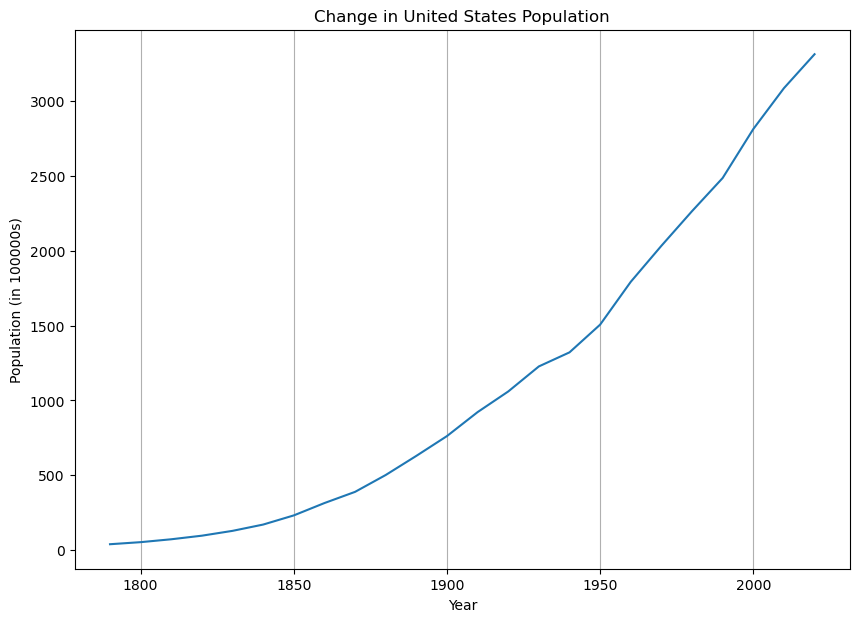

In [89]:
Population = []
POPU = np.array(United_States_demographics_df['Population'].values)
YEARS = np.array(United_States_demographics_df['Year'].values)
# Removing ',' in the string and saving as int
for value in POPU:
    value = int(value.replace(',', ''))
    Population.append(value/100000)
# Create a line plot with a title and axis labels
plt.figure(figsize=(10, 7))
plt.title('Change in United States Population')
plt.xlabel('Year')
plt.ylabel('Population (in 100000s)')
plt.plot(YEARS, Population)
plt.grid(axis='x')
plt.show()

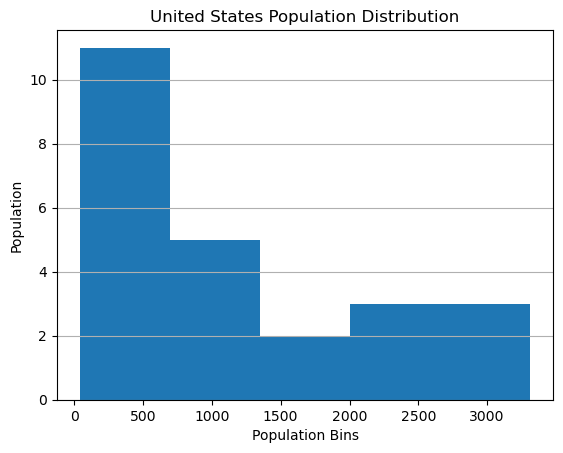

In [90]:
plt.hist(Population, bins=5)
plt.title('United States Population Distribution')
plt.xlabel('Population Bins')
plt.ylabel('Population')
plt.grid(axis='y')
plt.show()